In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from sklearn.metrics import classification_report , confusion_matrix
plt.rcParams['figure.figsize'] = (15,10)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , BernoulliNB , GaussianNB
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# Data Collection

In [31]:
salary_train = pd.read_csv("SalaryData_Train.csv")
salary_test = pd.read_csv("SalaryData_Test.csv")

In [32]:
salary_train.head(10)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [33]:
salary_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


# Exploratory Data Analysis (EDA)


<h2 style="color:black; font-family: Arial;">check for null and duplicate</h2>


In [34]:
salary_train.isna().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

In [35]:
salary_train[salary_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [36]:
salary_train.drop(index=salary_train[salary_train.duplicated()].index,inplace=True)

In [37]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [38]:
X = salary_train.drop('Salary',axis=1)
Y = salary_train['Salary']

In [39]:
oe = OrdinalEncoder()
lb = LabelEncoder()
X[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']] = oe.fit_transform(X[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']])
Y = lb.fit_transform(Y)

<h2 style="color:black; font-family: Arial;">Visulization</h2>


<Axes: xlabel='Salary', ylabel='count'>

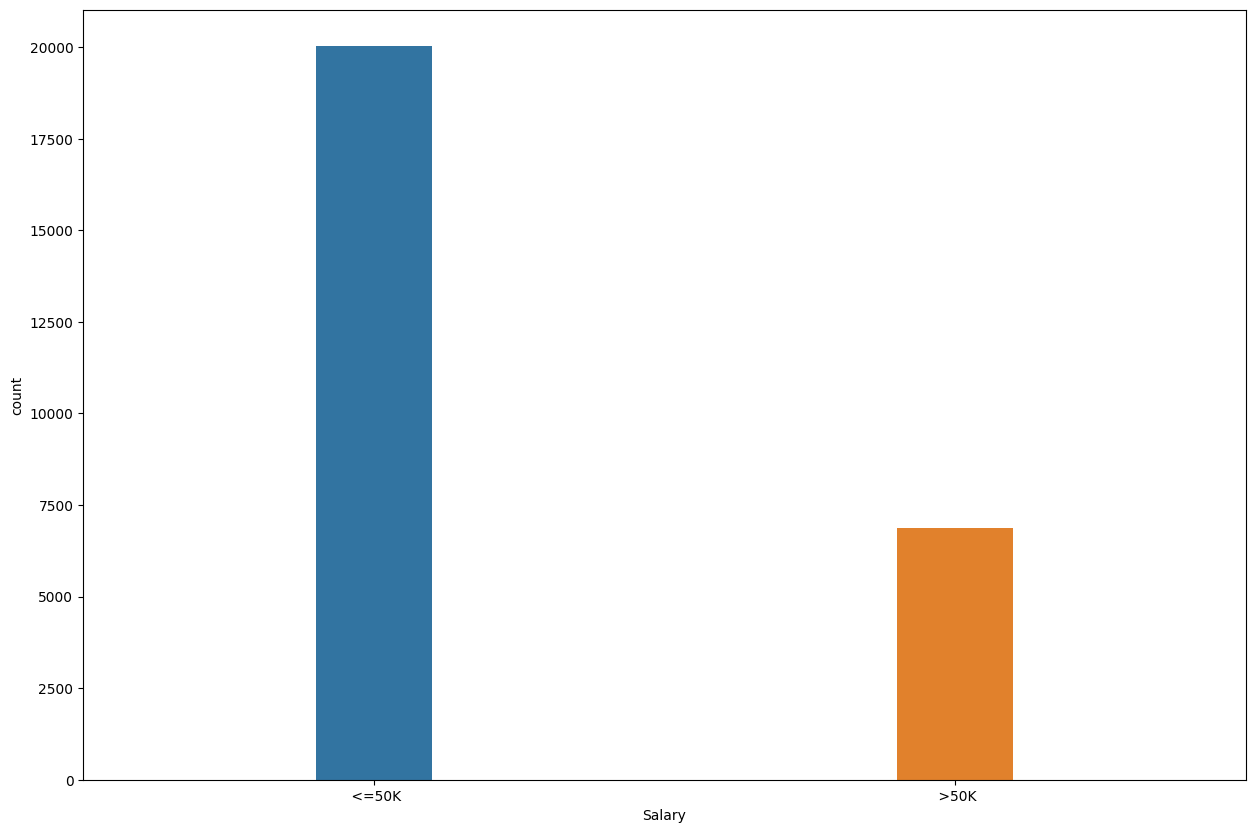

In [40]:
sns.countplot(data=salary_train,x='Salary',width=0.2)

<Axes: xlabel='maritalstatus'>

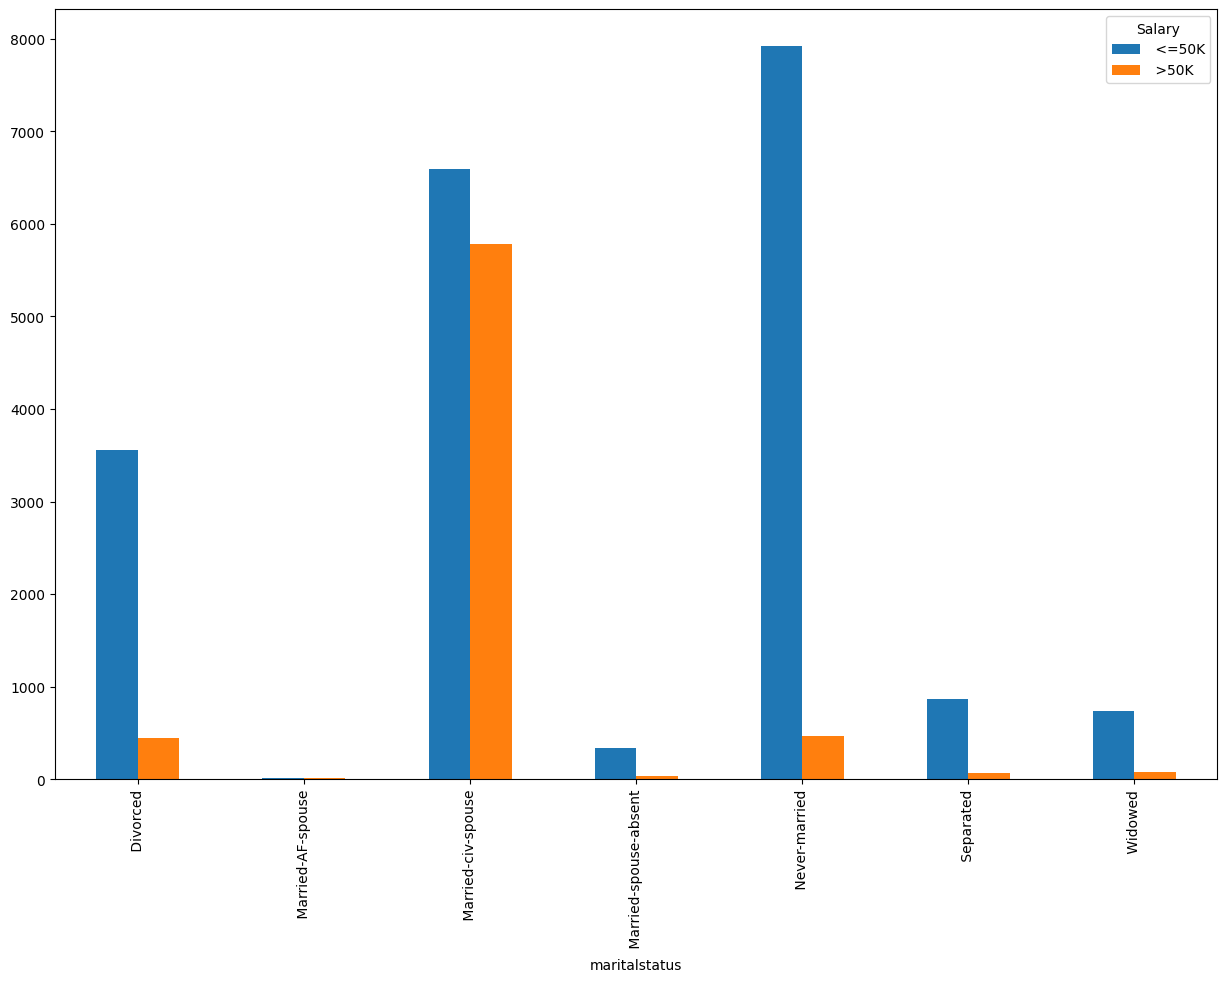

In [42]:
crosstab = pd.crosstab(index=salary_train['maritalstatus'],columns=salary_train['Salary'])
crosstab.plot.bar()

<Axes: xlabel='workclass'>

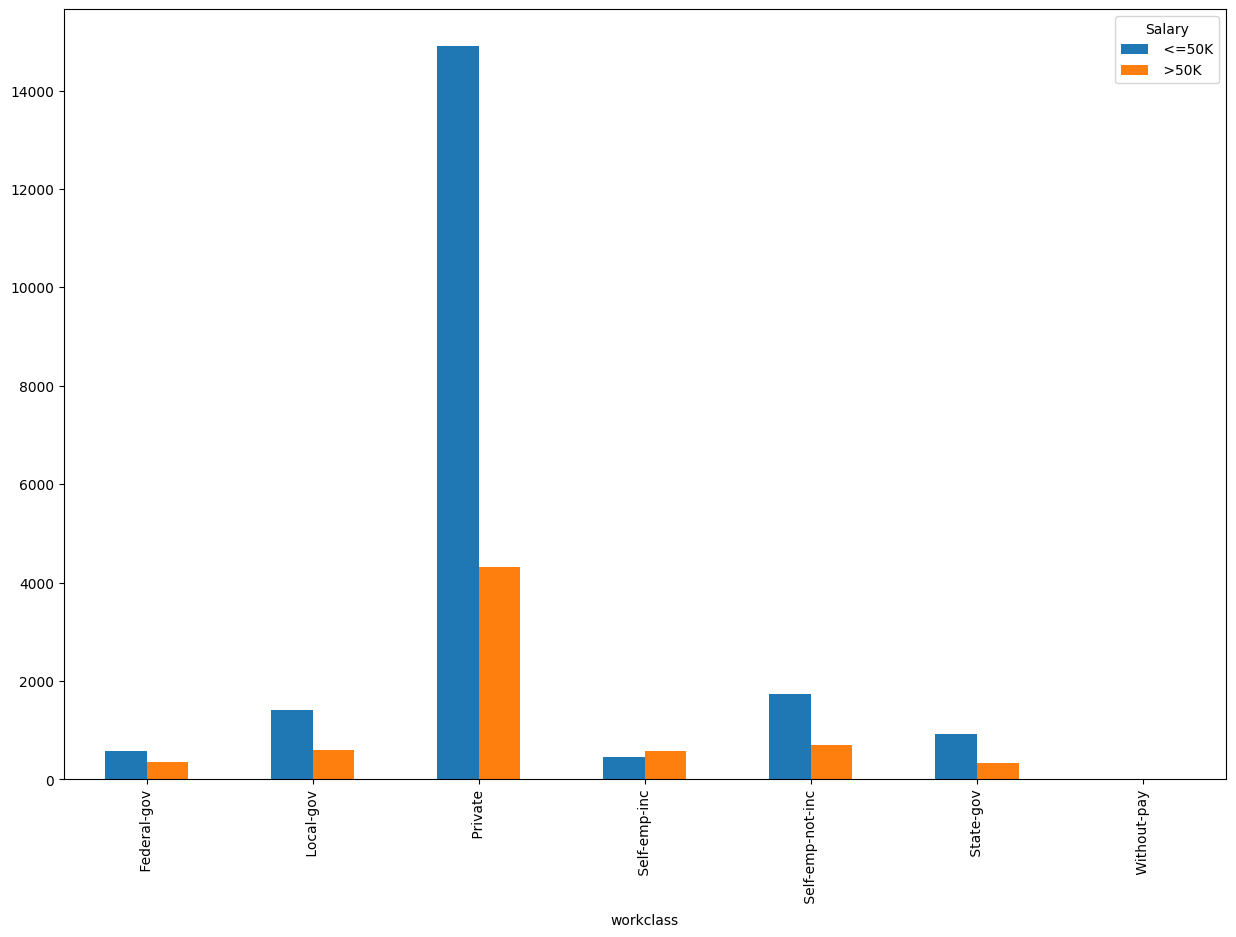

In [43]:
crosstab = pd.crosstab(index=salary_train['workclass'],columns=salary_train['Salary'])
crosstab.plot.bar()

<Axes: xlabel='education'>

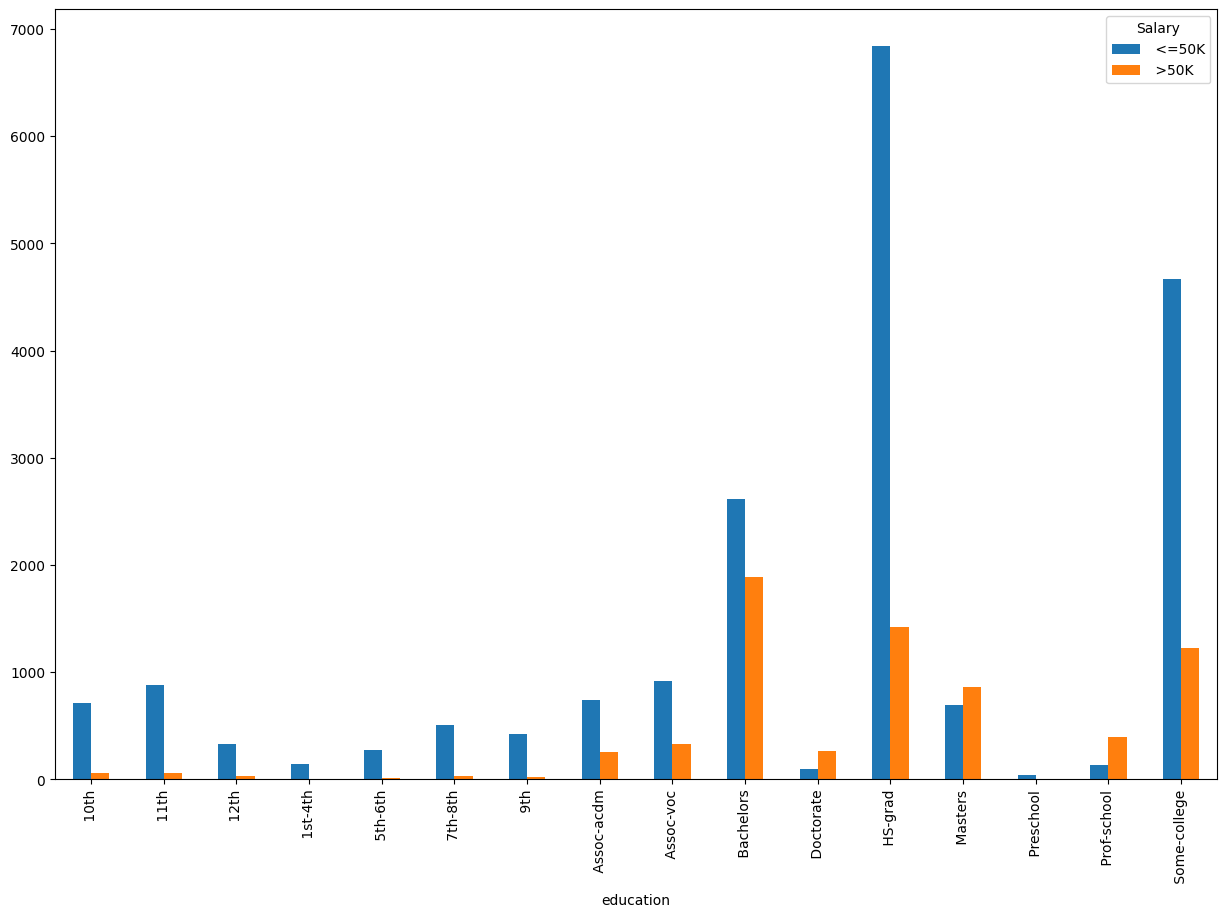

In [44]:
crosstab = pd.crosstab(index=salary_train['education'],columns=salary_train['Salary'])
crosstab.plot.bar()

<Axes: xlabel='relationship'>

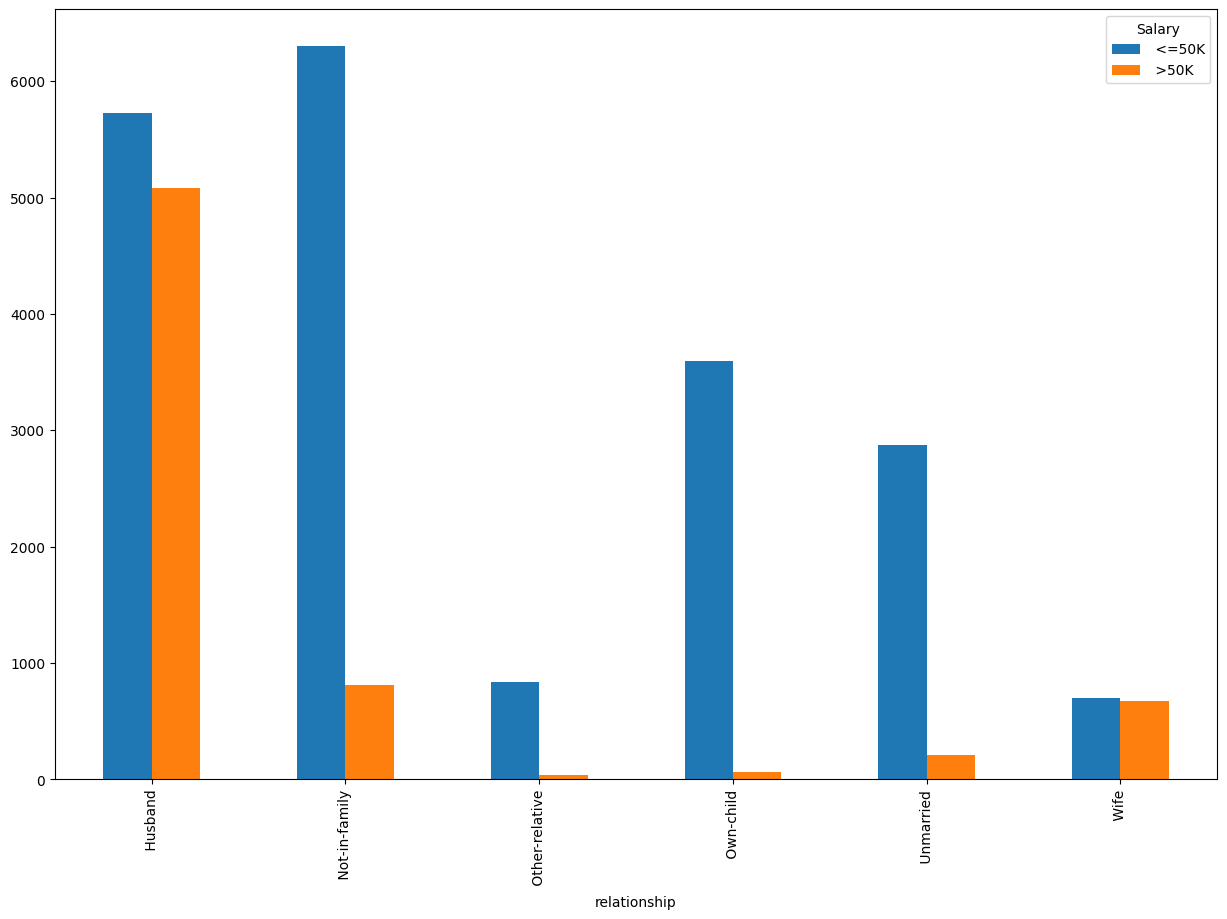

In [45]:
crosstab = pd.crosstab(index=salary_train['relationship'],columns=salary_train['Salary'])
crosstab.plot.bar()

<Axes: xlabel='sex'>

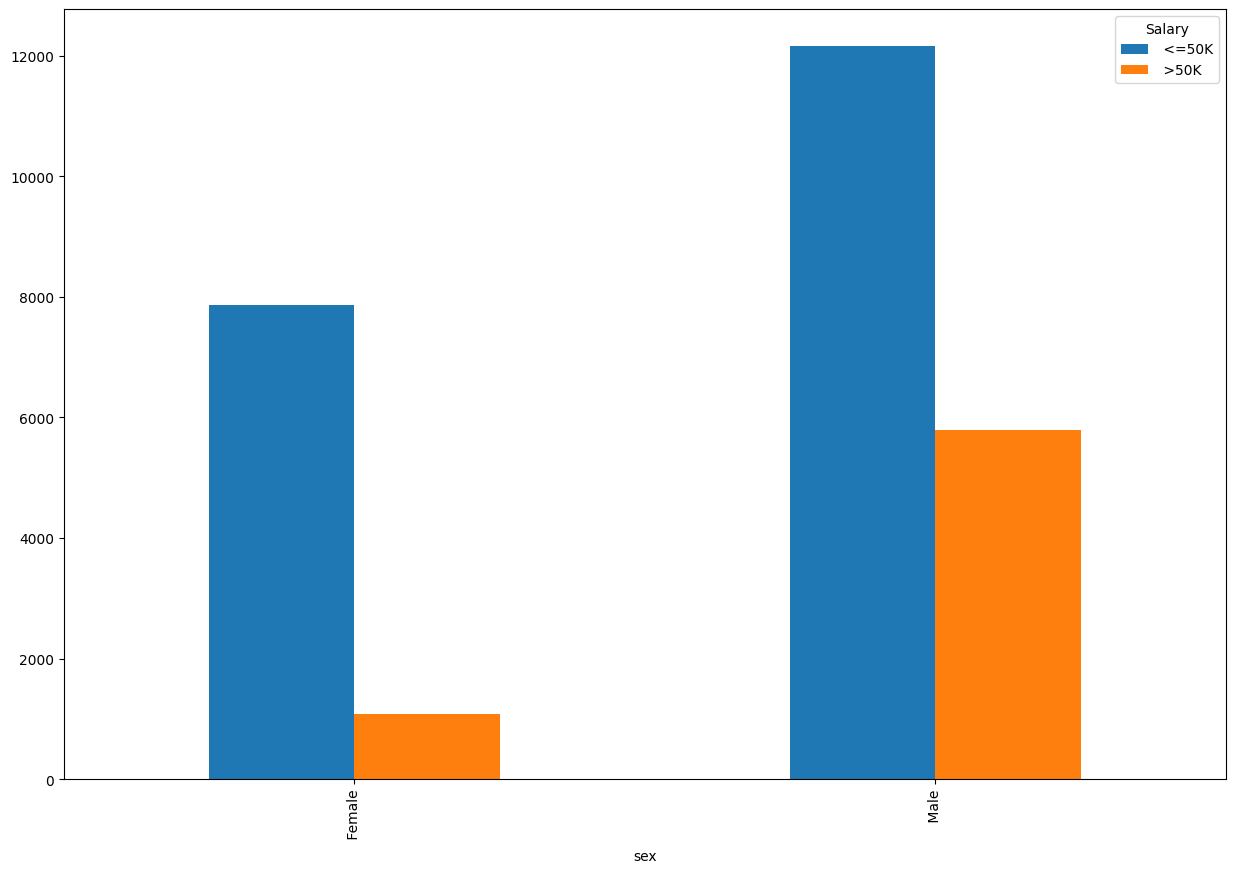

In [46]:
crosstab = pd.crosstab(index=salary_train['sex'],columns=salary_train['Salary'])
crosstab.plot.bar()

<Axes: xlabel='race'>

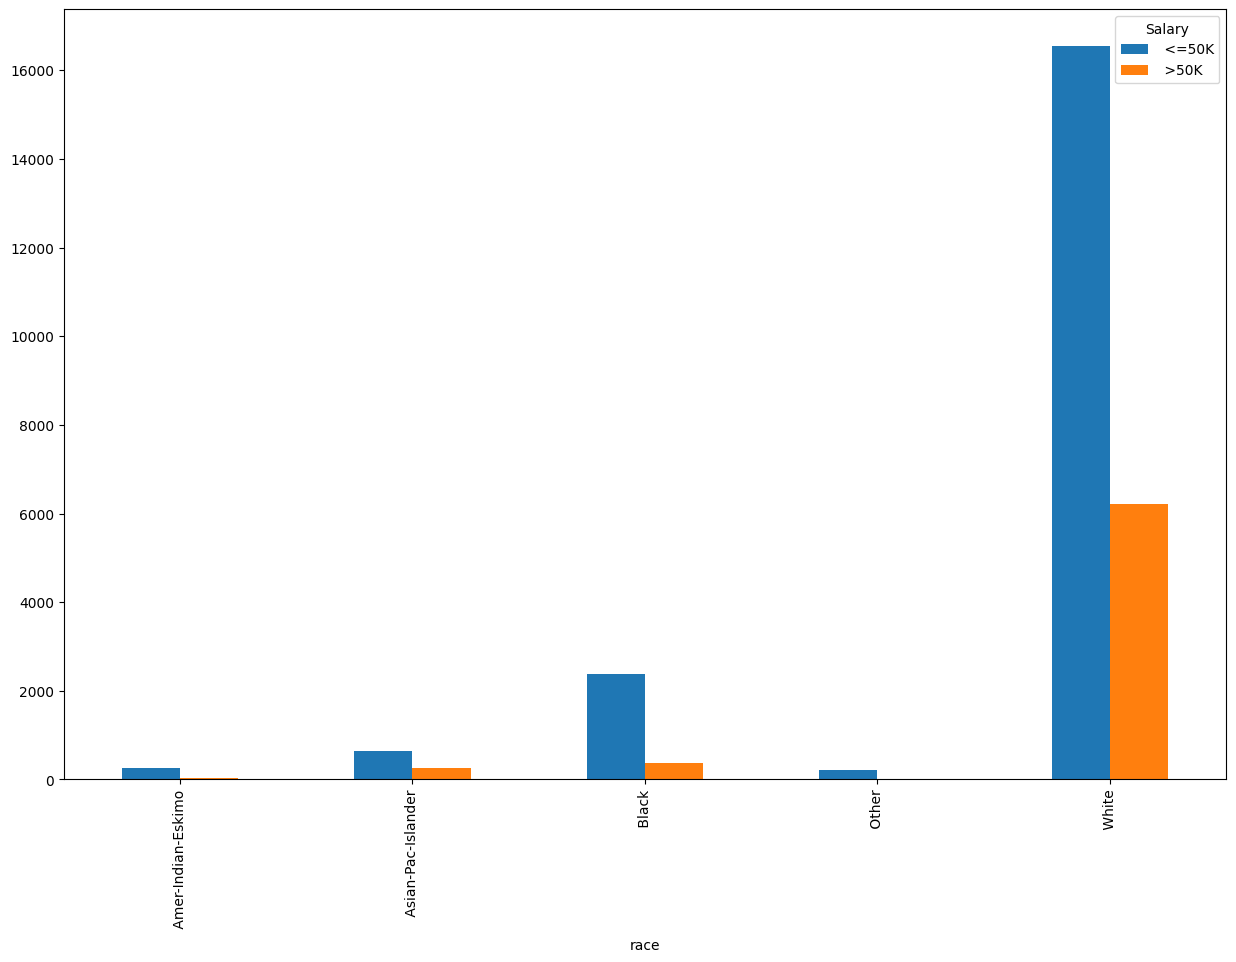

In [47]:
crosstab = pd.crosstab(index=salary_train['race'],columns=salary_train['Salary'])
crosstab.plot.bar()

<h2 style="color:black; font-family: Arial;">model building</h2>


In [48]:
xtrain,xval , ytrain,yval = train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)

MultinomialNB()

In [50]:
print(f"Train Accuracy : {round(nb.score(xtrain,ytrain),2)} \nTest Accuracy : {round(nb.score(xval,yval),2)}")

Train Accuracy : 0.77 
Test Accuracy : 0.78


In [51]:
ypred = nb.predict(xval)

In [52]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      4032
           1       0.66      0.24      0.35      1349

    accuracy                           0.78      5381
   macro avg       0.72      0.60      0.61      5381
weighted avg       0.76      0.78      0.74      5381



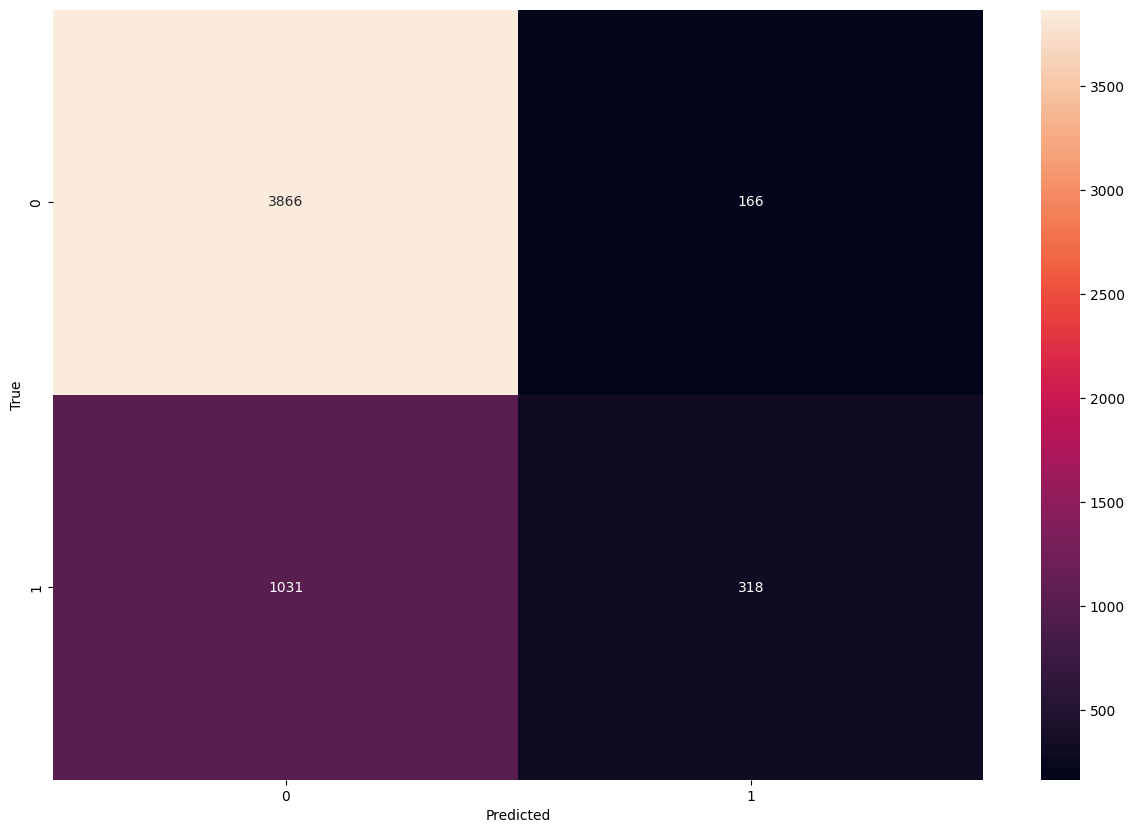

In [53]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

<h2 style="color:black; font-family: Arial;">gaussian nb</h2>


In [54]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [55]:
print(f"Train Accuracy : {round(gnb.score(xtrain,ytrain),2)} \nTest Accuracy : {round(gnb.score(xval,yval),2)}")

Train Accuracy : 0.79 
Test Accuracy : 0.8


In [56]:
ypred = gnb.predict(xval)

In [57]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      4032
           1       0.71      0.35      0.47      1349

    accuracy                           0.80      5381
   macro avg       0.76      0.65      0.67      5381
weighted avg       0.79      0.80      0.78      5381



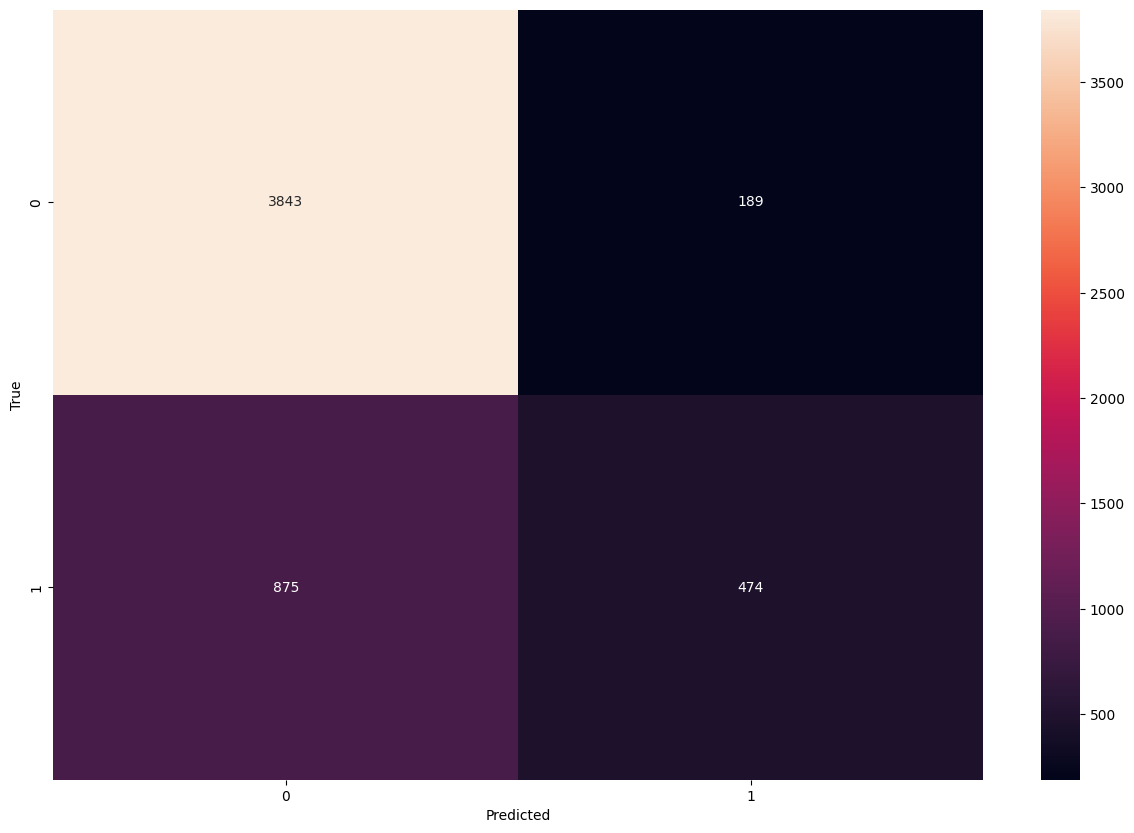

In [58]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

<h2 style="color:black; font-family: Arial;">bernoulllis nb</h2>


In [59]:
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)

BernoulliNB()

In [60]:
print(f"Train Accuracy : {round(bnb.score(xtrain,ytrain),2)} \nTest Accuracy : {round(bnb.score(xval,yval),2)}")

Train Accuracy : 0.73 
Test Accuracy : 0.74


In [61]:
ypred = bnb.predict(xval)

In [62]:
print(classification_report(yval,ypred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      4032
           1       0.48      0.72      0.58      1349

    accuracy                           0.74      5381
   macro avg       0.68      0.73      0.69      5381
weighted avg       0.79      0.74      0.75      5381



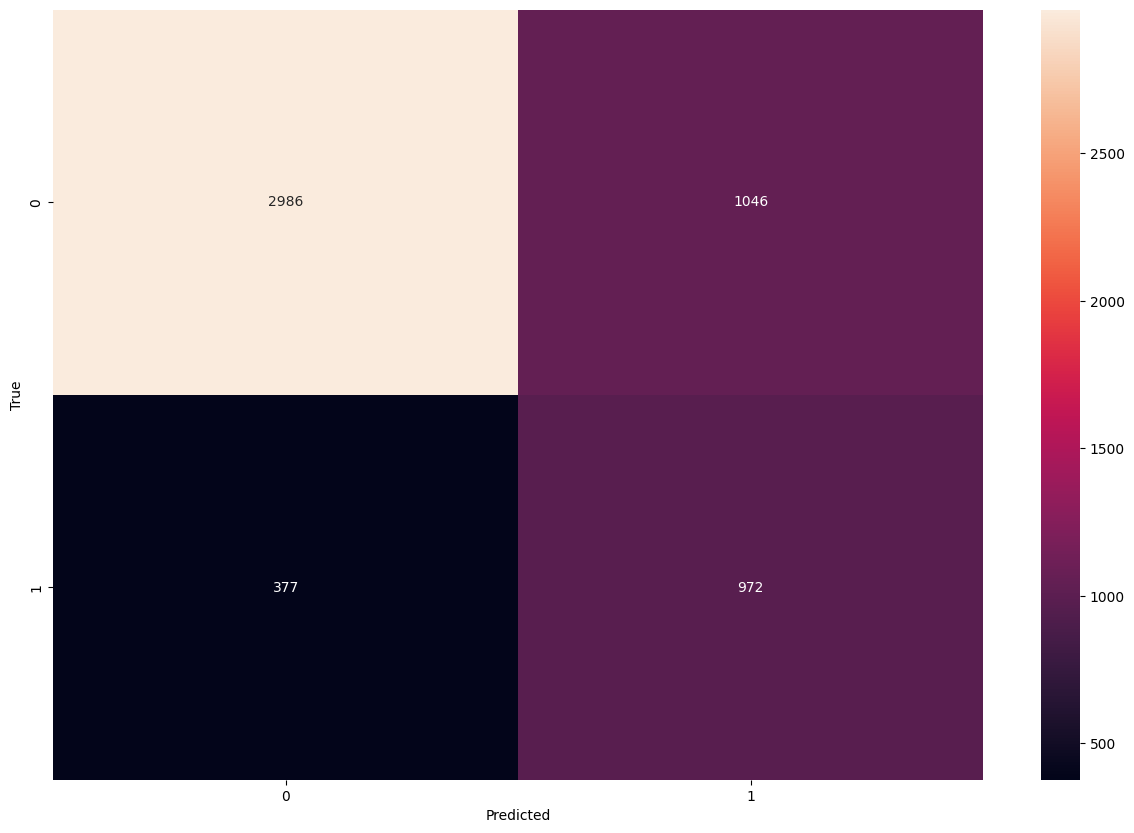

In [63]:
sns.heatmap(confusion_matrix(yval,ypred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

<h2 style="color:black; font-family: Arial;">test prediction using multinomial nb</h2>


In [64]:
test = pd.read_csv('./SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [65]:
X_test = test.drop('Salary',axis=1)
Y_test = test['Salary']

In [66]:
X_test[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']] = oe.transform(X_test[['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'native']])
Y_test = lb.transform(Y_test)

In [67]:
y_test_pred = nb.predict(X_test)

In [68]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



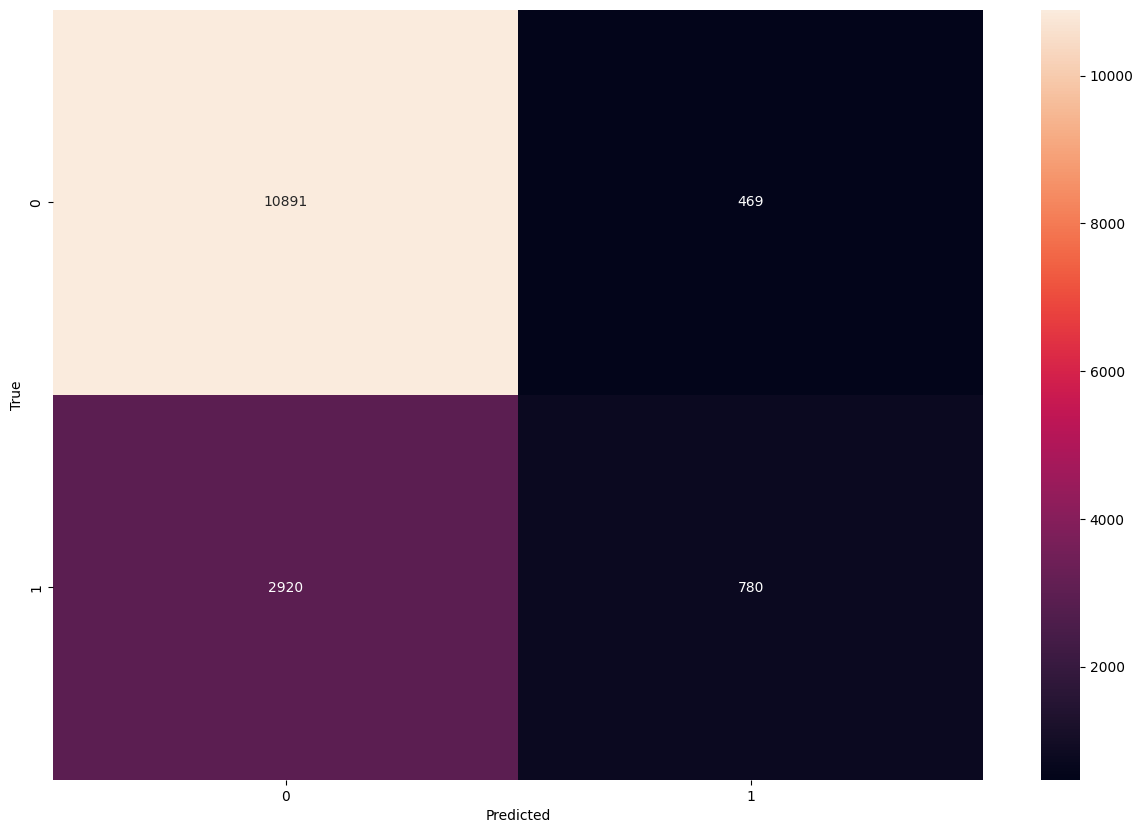

In [69]:
sns.heatmap(confusion_matrix(Y_test,y_test_pred),annot=True,fmt=".0f")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()